#Self Organizing Map

##Install MiniSom Package

In [ ]:
!pip install MiniSom

### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [37]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Feature Scaling


In [38]:
 from sklearn.preprocessing import MinMaxScaler
 sc = MinMaxScaler(feature_range = (0,1))
 x = sc.fit_transform(x)

##Training the SOM


In [39]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len = 15,sigma=1.0, learning_rate=0.5)

In [43]:
som.random_weights_init(x)
som.train_random(data=x,num_iteration=100)

##Visualizing the results


In [32]:
from pylab import bone, pcolor, colorbar, plot, show

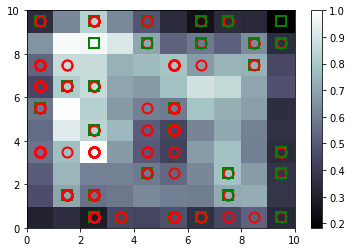

In [44]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r','g']
for i, s in enumerate(x):
  w = som.winner(s)
  plot(w[0]+0.5, 
       w[1]+0.5, 
       markers[y[i]], 
       markeredgecolor =colors[y[i]], 
       markerfacecolor = 'None', 
       markersize =10, 
       markeredgewidth=2)

## Finding the frauds


In [52]:
mappings = som.win_map(x)
fraud = np.concatenate((mappings[(2,3)],mappings[(1,7)]), axis = 0)
fraud = sc.inverse_transform(fraud)

##Printing the Fraunch Clients

In [53]:
print(fraud[:,0])#customer ids

[15594305. 15664793. 15670029. 15763579. 15662189. 15793825. 15696361.
 15568469. 15782159. 15586479. 15717700. 15705379. 15583724. 15750104.
 15646535. 15749964. 15644400. 15684440.]
